# 1. Data Cleaning and Setup

In [1]:
og_file_path = '/kaggle/input/mpa-and-fishery-consumption-2017-2022/og-unclean-data.csv'
spatial_file_path = '/kaggle/input/mpa-and-fishery-country-wise/Spatial-unclean-data.csv'
temporal_file_path = '/kaggle/input/global-mpa-and-fishery-consumption/Temporal-unclean-data.csv'

In [2]:
import pandas as pd
og_data = pd.read_csv(og_file_path).drop(columns=['Unnamed: 13', 'Unnamed: 14'])
spatial_data = pd.read_csv(spatial_file_path).drop(columns=['Unnamed: 3'])
temporal_data = pd.read_csv(temporal_file_path).drop(columns=['Unnamed: 3', 'Unnamed: 4'])

In [3]:
print(og_data.head(2))
print(spatial_data.head(2))
print(temporal_data.head(2))

                  Country Name       2017        2018        2019        2020  \
0                        Aruba      149.5      150.00      164.50      161.50   
1  Africa Eastern and Southern  3897511.9  3883753.45  3821770.86  3805060.99   

         2021        2022    2017.1    2018.1    2019.1    2020.1    2021.1  \
0      166.50      173.50  0.000105  0.000105  0.000105  0.000105  0.000105   
1  4097350.48  3725334.12  4.945690  4.945687  5.235880  5.036564  5.040512   

     2022.1  
0  0.000105  
1       NaN  
                  Country Name       Fishery       MPA
0                        Aruba  1.495000e+02  0.000105
1  Africa Eastern and Southern  3.871797e+06  5.040867
   Year       MPA  FisheryConsumption
0  2017  8.655928        8.734377e+06
1  2018  8.195815        9.019346e+06


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
print(og_data.info())
print(spatial_data.info())
print(temporal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2017          245 non-null    float64
 2   2018          245 non-null    float64
 3   2019          245 non-null    float64
 4   2020          245 non-null    float64
 5   2021          245 non-null    float64
 6   2022          231 non-null    float64
 7   2017.1        206 non-null    float64
 8   2018.1        205 non-null    float64
 9   2019.1        208 non-null    float64
 10  2020.1        209 non-null    float64
 11  2021.1        208 non-null    float64
 12  2022.1        171 non-null    float64
dtypes: float64(12), object(1)
memory usage: 27.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 

In [5]:
print(og_data.describe())
print(spatial_data.describe())
print(temporal_data.describe())

               2017          2018          2019          2020          2021  \
count  2.450000e+02  2.450000e+02  2.450000e+02  2.450000e+02  2.450000e+02   
mean   8.734377e+06  9.019346e+06  9.031341e+06  9.071383e+06  9.289091e+06   
std    3.073645e+07  3.167287e+07  3.181947e+07  3.205374e+07  3.276712e+07   
min    5.800000e+01  6.300000e+01  7.300000e+01  1.433700e+02  1.306900e+02   
25%    1.836354e+04  1.696663e+04  1.719532e+04  1.749413e+04  1.816000e+04   
50%    1.229460e+05  1.313180e+05  1.333800e+05  1.396476e+05  1.476814e+05   
75%    1.880688e+06  1.946513e+06  1.877376e+06  1.914024e+06  1.912068e+06   
max    2.049177e+08  2.113381e+08  2.113452e+08  2.119485e+08  2.169865e+08   

               2022      2017.1      2018.1      2019.1      2020.1  \
count  2.310000e+02  206.000000  205.000000  208.000000  209.000000   
mean   9.814026e+06    8.655928    8.195815    9.041949    8.966815   
std    3.393820e+07   16.829676   15.593697   17.316485   16.416245   
min 

In [6]:
og_data.fillna(method='ffill', inplace=True)
spatial_data.dropna(subset=['MPA', 'Fishery'], inplace=True)
temporal_data.dropna(subset=['MPA', 'FisheryConsumption'], inplace=True)

og_data.to_csv('/kaggle/working/cleaned_og_data.csv', index=False)
spatial_data.to_csv('/kaggle/working/cleaned_spatial_data.csv', index=False)
temporal_data.to_csv('/kaggle/working/cleaned_temporal_data.csv', index=False)

/tmp/ipykernel_35/1828919130.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  og_data.fillna(method='ffill', inplace=True)


# 2. Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for df in [og_data, spatial_data]:
    if 'Country Name' in df.columns:
        df['Country Name'] = encoder.fit_transform(df['Country Name'])

og_data.to_csv('/kaggle/working/cleaned_encoded_og_data.csv', index=False)
spatial_data.to_csv('/kaggle/working/cleaned_encoded_spatial_data.csv', index=False)
temporal_data.to_csv('/kaggle/working/cleaned_encoded_temporal_data.csv', index=False)

# 3. One-Hot Encoding + Scaling

In [8]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

def preprocess_data(df, name):
    if 'Country Name' in df.columns:
        ohe = OneHotEncoder(sparse=False)
        ohe_array = ohe.fit_transform(df[['Country Name']])
        df = df.drop('Country Name', axis=1)
        df[ohe.get_feature_names_out(['Country Name'])] = ohe_array

    minmax_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
    std_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

    minmax_df.to_csv(f'/kaggle/working/{name}-nrm.csv', index=False)
    std_df.to_csv(f'/kaggle/working/{name}-std.csv', index=False)

    return minmax_df, std_df

minmax_og, std_og = preprocess_data(og_data.copy(), 'og_data')
minmax_spatial, std_spatial = preprocess_data(spatial_data.copy(), 'spatial_data')
minmax_temporal, std_temporal = preprocess_data(temporal_data.copy(), 'temporal_data')


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_35/3910974376.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out(['Country Name'])] = ohe_array
/tmp/ipykernel_35/3910974376.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out(['Country Nam

# 4. Visual Exploration

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

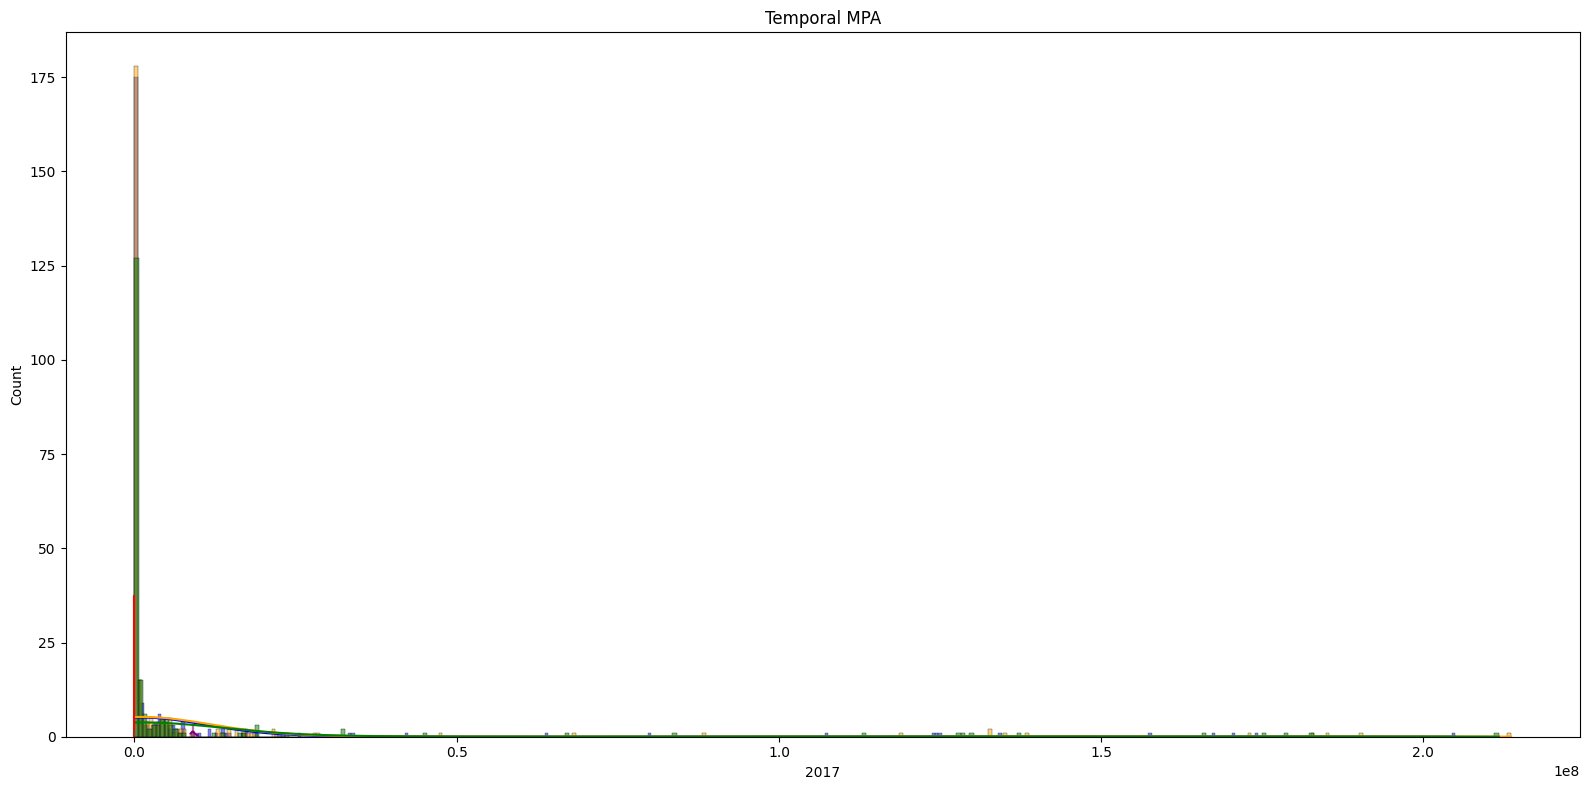

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.histplot(og_data['2017'], kde=True, color='blue'); plt.title('OG 2017')
sns.histplot(og_data['2022'], kde=True, color='orange'); plt.title('OG 2022')
sns.histplot(spatial_data['Fishery'], kde=True, color='green'); plt.title('Spatial Fishery')
sns.histplot(spatial_data['MPA'], kde=True, color='red'); plt.title('Spatial MPA')
sns.histplot(temporal_data['FisheryConsumption'], kde=True, color='purple'); plt.title('Temporal Consumption')
sns.histplot(temporal_data['MPA'], kde=True, color='brown'); plt.title('Temporal MPA')
plt.tight_layout()
plt.show()

# 5. Outlier Detection

In [10]:
import numpy as np

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data < lower) | (data > upper), lower, upper

def cap_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers, lower, upper = find_outliers_iqr(df[col])
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

og_data_capped = cap_outliers(og_data.copy())
spatial_data_capped = cap_outliers(spatial_data.copy())
temporal_data_capped = cap_outliers(temporal_data.copy())

# 6. Correlation Heatmaps

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


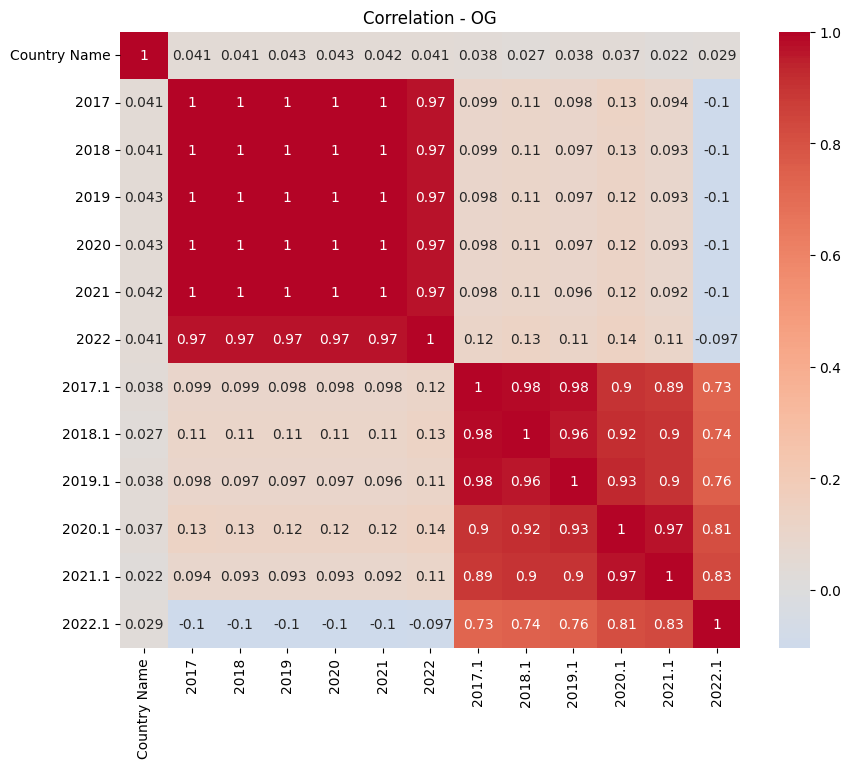

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


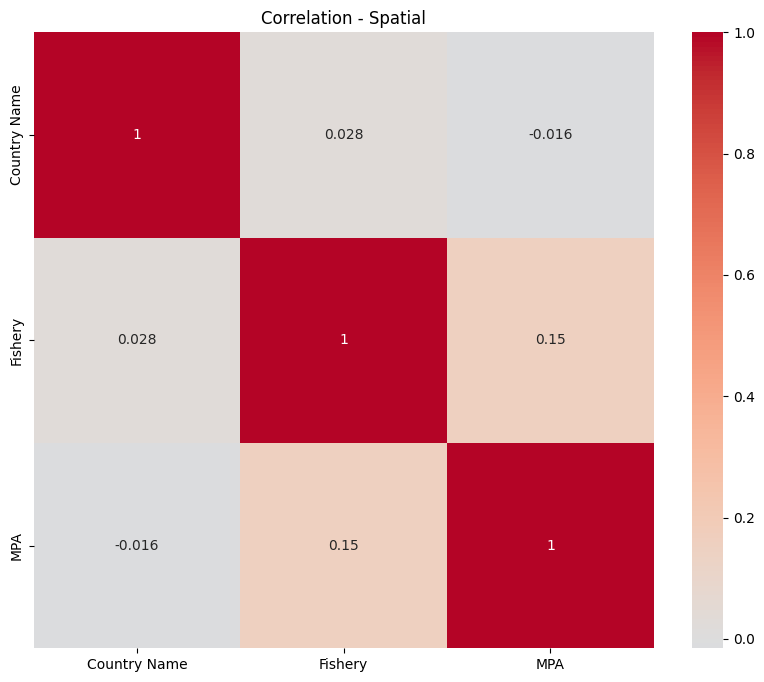

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


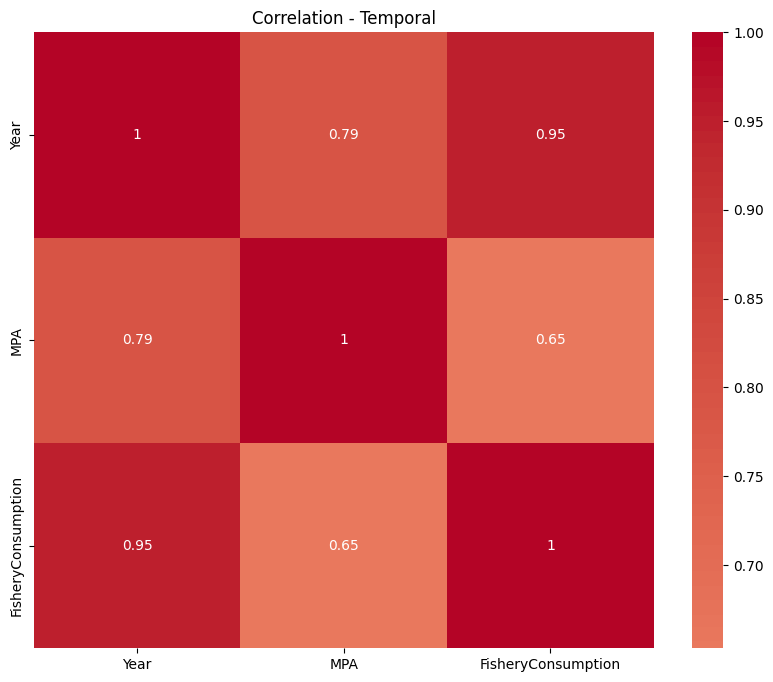

In [11]:
def plot_corr(df, title):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation - {title}')
    plt.show()

plot_corr(og_data_capped, 'OG')
plot_corr(spatial_data_capped, 'Spatial')
plot_corr(temporal_data_capped, 'Temporal')

# 7. Model Training & Residuals

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = temporal_data.iloc[:, [0,1]].values
y = temporal_data.iloc[:, 2].values

In [13]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'GBR': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge()
}

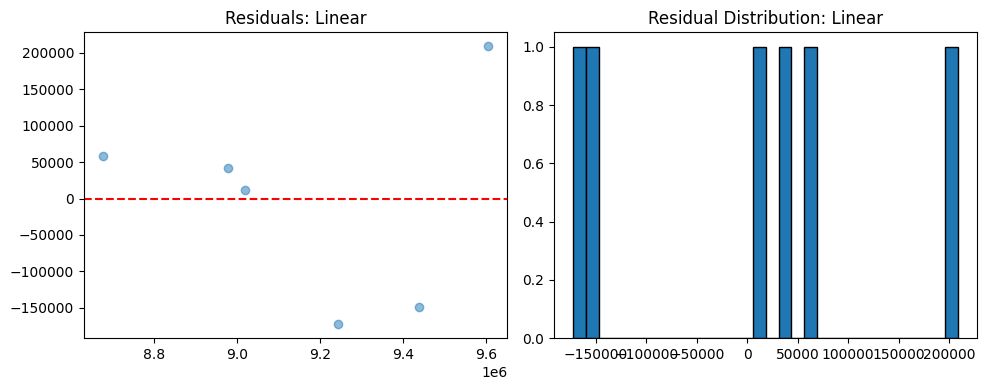

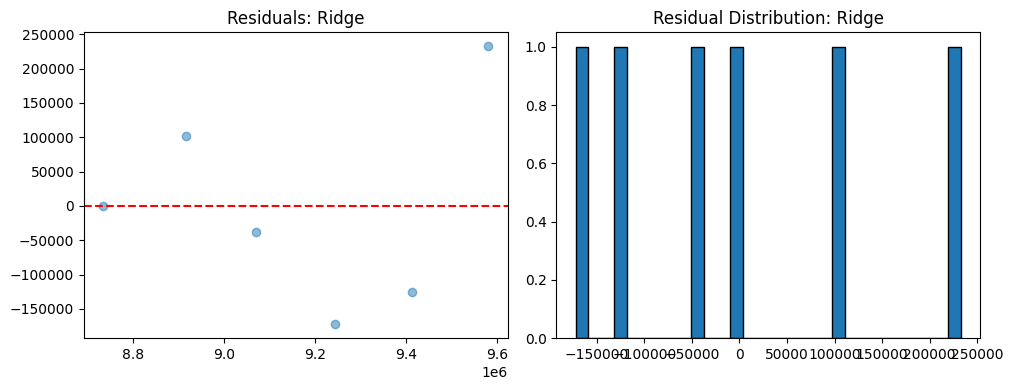

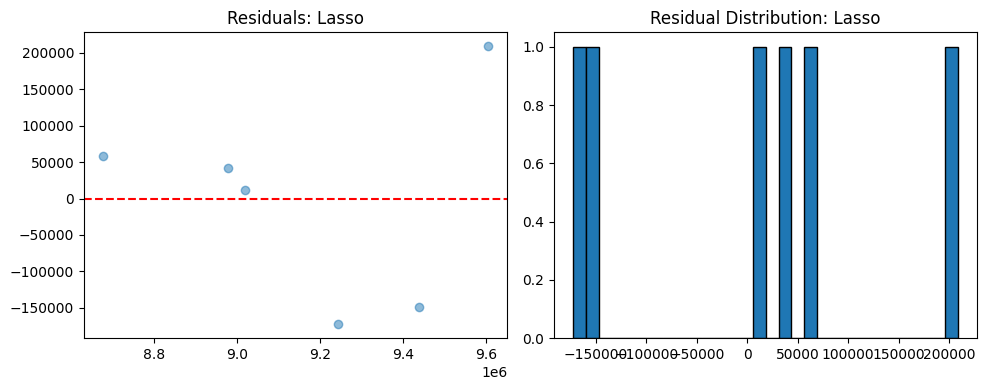

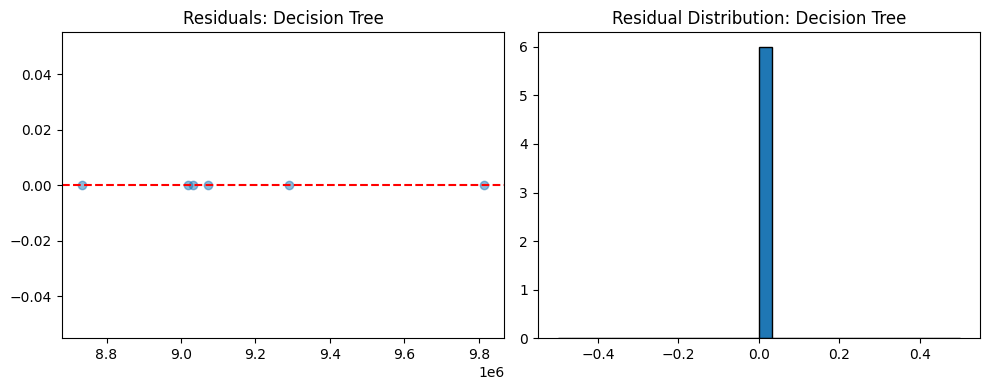

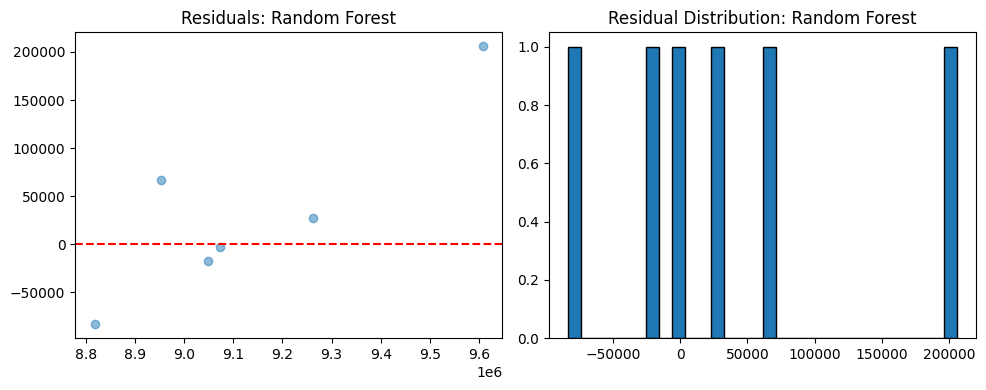

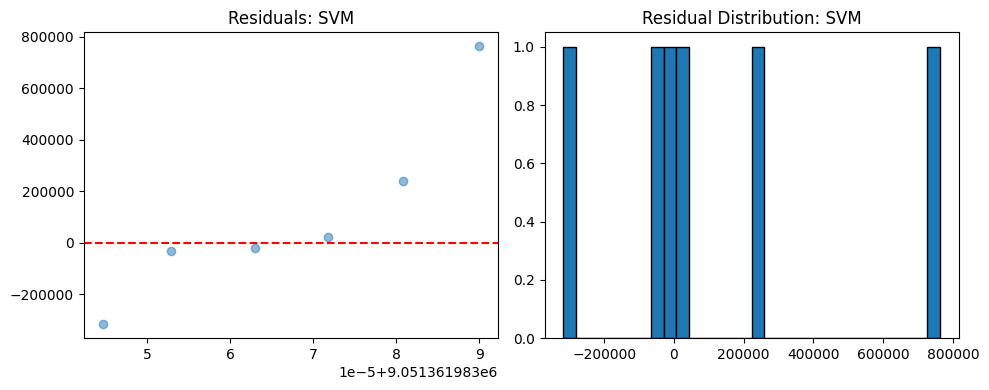

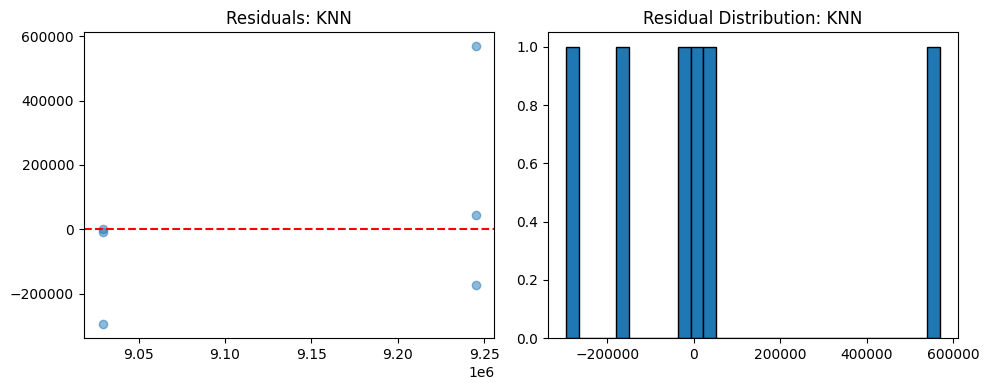

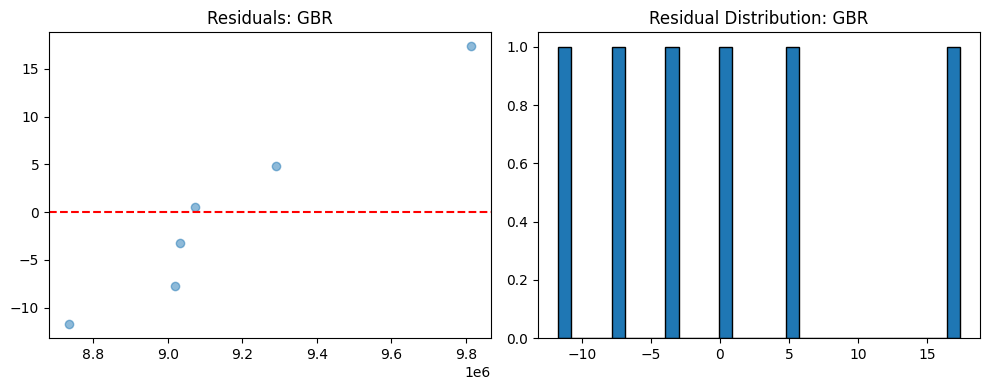

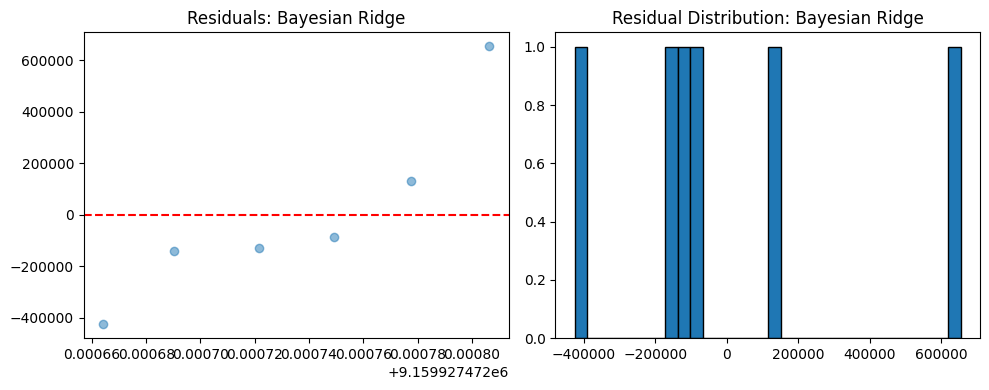

In [14]:
results = []
for name, model in models.items():
    model.fit(x, y)
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

    # Plot residuals
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals: {name}')
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=30, edgecolor='k')
    plt.title(f'Residual Distribution: {name}')
    plt.tight_layout()
    plt.show()

# 8. Comparison Plot

/tmp/ipykernel_35/2538970133.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result_df['Model'], rotation=45)


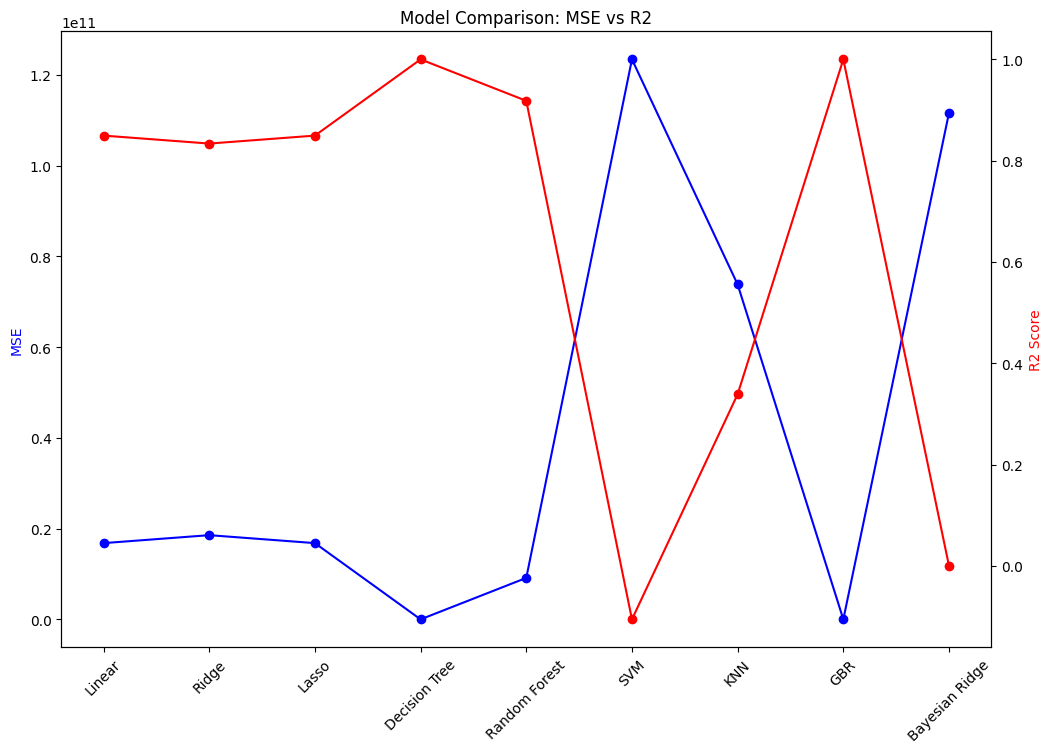

In [15]:
result_df = pd.DataFrame(results)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(result_df['Model'], result_df['MSE'], 'b-o', label='MSE')
ax2 = ax1.twinx()
ax2.plot(result_df['Model'], result_df['R2'], 'r-o', label='R2 Score')

ax1.set_ylabel('MSE', color='b')
ax2.set_ylabel('R2 Score', color='r')
ax1.set_xticklabels(result_df['Model'], rotation=45)
plt.title('Model Comparison: MSE vs R2')
plt.show()

# 9. Year-on-Year Change

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


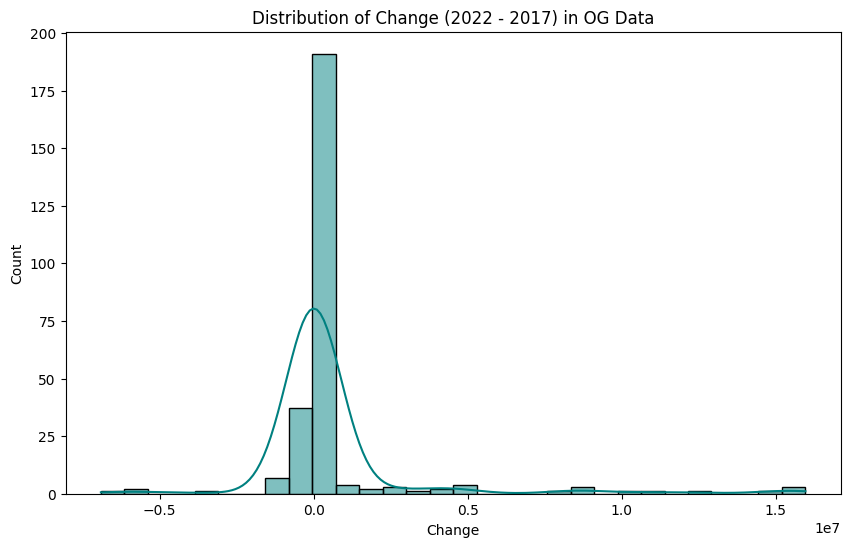

In [16]:
og_data['Change_2017_2022'] = og_data['2022'] - og_data['2017']
plt.figure(figsize=(10, 6))
sns.histplot(og_data['Change_2017_2022'], bins=30, kde=True, color='teal')
plt.title('Distribution of Change (2022 - 2017) in OG Data')
plt.xlabel('Change')
plt.show()

In [19]:
unchanged = og_data[og_data['Change_2017_2022'] == 0.0]
print(unchanged[['Country Name', '2017', '2022']].head(10))
print(f"Unchanged count: {len(unchanged)} / {len(og_data)}")

     Country Name   2017   2022
224            72  165.0  165.0
225           213  165.0  165.0
Unchanged count: 2 / 266


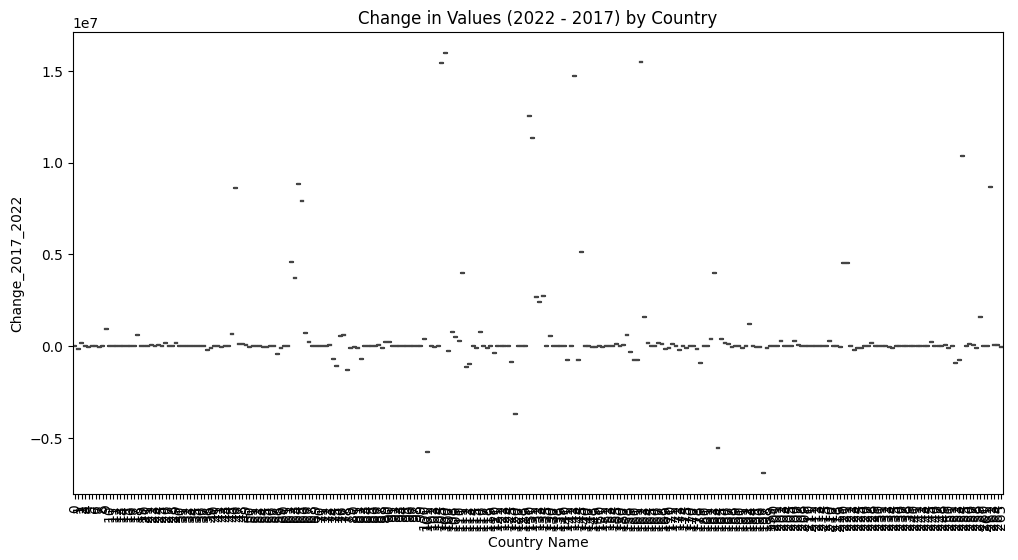

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country Name', y='Change_2017_2022', data=og_data)
plt.xticks(rotation=90)
plt.title('Change in Values (2022 - 2017) by Country')
plt.show()

# 10. Feature Importance for Tree Models

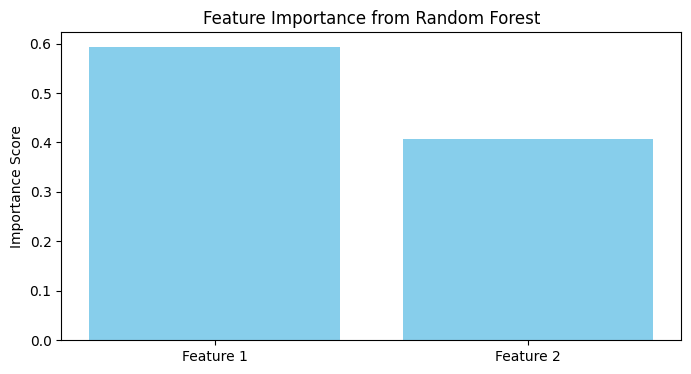

In [17]:
rf = RandomForestRegressor()
rf.fit(x, y)
importances = rf.feature_importances_

plt.figure(figsize=(8, 4))
plt.bar(['Feature 1', 'Feature 2'], importances, color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


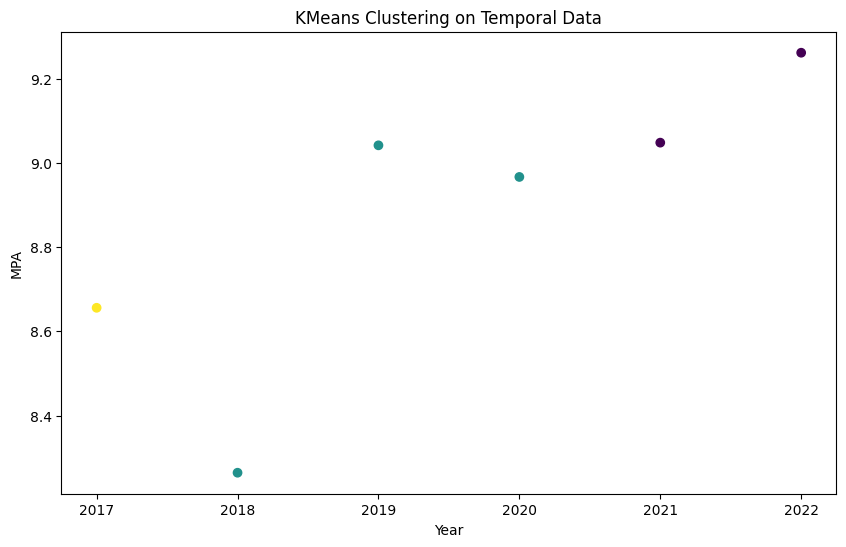

In [22]:
from sklearn.cluster import KMeans

X_clust = temporal_data_capped.select_dtypes(include=[float, int])
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clust)

plt.figure(figsize=(10, 6))
plt.scatter(X_clust.iloc[:, 0], X_clust.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clustering on Temporal Data')
plt.xlabel(X_clust.columns[0])
plt.ylabel(X_clust.columns[1])
plt.show()